## Esercizi - Metodi numerici per il fitting di modelli lineari

- trasformazioni ortogonali di Householder per il calcolo della fattorizzazione QR

- effetto del rumore nella stima ai minimi quadrati

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Householder

In [2]:
# Vediamo la precisione del metodo di Householder nel calcolo della 
# fattorizzazione QR.
# Costruiamo una matrice molto malcondizionata:
n = 100
[U,X] = np.linalg.qr(np.random.randn(n,n))
[V,X] = np.linalg.qr(np.random.randn(n,n))
S = np.diag(2.**np.arange(0,-n,-1))
A = U @ S @ V.T;

print(np.linalg.cond(A))

5.752527629619109e+18


In [3]:
# Calcolo della fattorizzazione QR con le trasformazioni di Householder
# L'algoritmo calcola R sul posto occupato da A, ed i vettori di Householder v_k che definiscono
# univocamente le matrici Q_k
def Householder(A,verbose=False):
    # INPUT:  A - np.array 2D
    m = A.shape[0] 
    n = A.shape[1]  
    V = np.zeros([m, n])
    for k in range(0,n):  # itero sulle colonne
        x = np.atleast_2d(A[k:m,k]).T
        e_1 = np.zeros([m-k,1]); e_1[0] = 1.0;
        v_k = np.sign(float(x[0]))*np.linalg.norm(x,2)*e_1 + x;     # v_k e' stato cambiato di segno per maggior efficienza del calcolo
        v_k = v_k / np.linalg.norm(v_k,2);
        A[k:m,k:n] = A[k:m,k:n] - 2*v_k@v_k.T@A[k:m,k:n];
        if verbose: print('A = ',A)
        V[k:m,k] = np.squeeze(v_k)
    #endfor
    return V,A

In [4]:
V, R = Householder(A.copy())

In [5]:
# ricostruiamo la matrice Q dai vettori di Householder:
Q = np.eye(n)  # inizializzazione della matrice ortonormale Q
for j in range(n): 
    for k in range(n-1,-1,-1):  # ciclo per applicare ad ogni vettore le trasformazioni di Householder
        #print "k = ",k
        Q[k:n,j] = Q[k:n,j] - 2 * V[k:n,k] * (V[k:n,k].T @ Q[k:n,j])
    #endfor
#endfor

In [6]:
print("||A - Q*R|| = ", np.linalg.norm(A - Q@R,2))
# verifichiamo l'ortogonalità della matrice Q:
print("||I - Q'*Q|| = ", np.linalg.norm(np.eye(A.shape[0]) - Q.T@Q,2))
print('''
==> la matrice Q risulta ortogonale nonostante A sia fortemente malcondizionata !
''')

||A - Q*R|| =  4.493415719278185e-16
||I - Q'*Q|| =  2.797420798226758e-15

==> la matrice Q risulta ortogonale nonostante A sia fortemente malcondizionata !



## 2. Rumore

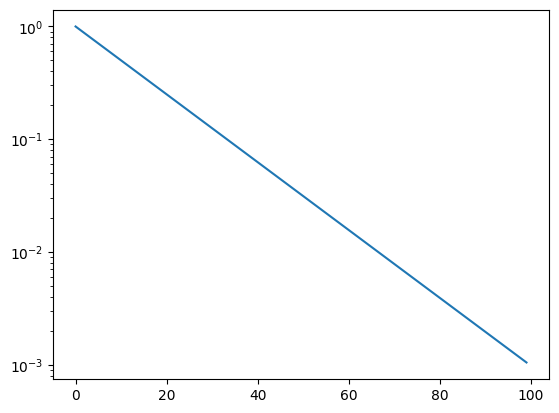

numero di condizionamento di A =  955.4257833337027


In [7]:
# Vediamo ora quanto può essere distruttiva la presenza di rumore nel 
# membro destro "b", se ad esempio ha componenti deterministiche, pur
# piccole.
# Costruaimo una matrice non molto malcondizionata:
n = 100
S = np.diag(2.**(0.1*np.arange(0,-n,-1)))
U,R = np.linalg.qr(np.random.randn(n,n)) 
V,R = np.linalg.qr(np.random.randn(n,n)) 
plt.figure(1); plt.semilogy(np.diag(S)); plt.show()
A = U @ S @ (V.T)
K2_A = np.linalg.cond(A,2);
print("numero di condizionamento di A = ", K2_A)

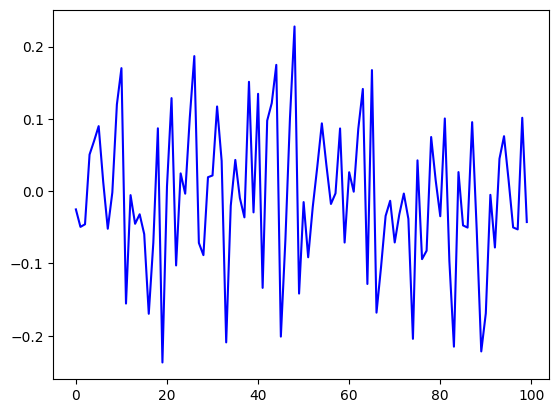

In [8]:
# ci costruiamo un esempio in cui la soluzione del sistema lineare
# sta addirittura tutta nella parte di modello meglio condizionata:
x_vero = V[:,0]
# e calcoliamo di conseguenza il membro destro:
b = A @ x_vero
plt.figure(2); plt.plot(b,'b-'); plt.show()

errore relativo LU =  5.1961638952697144e-14


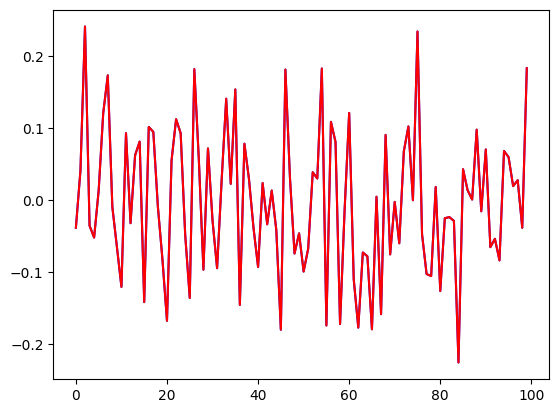

In [9]:
# risolviamo il sistema ed otteniamo un errore relativo molto piccolo:
x_LU = np.linalg.solve(A, b)
print("errore relativo LU = ", np.linalg.norm(x_LU - x_vero, 2)/np.linalg.norm(x_vero, 2))
plt.figure(3); plt.plot(x_vero,'b-'); plt.plot(x_LU,'r'); plt.show()

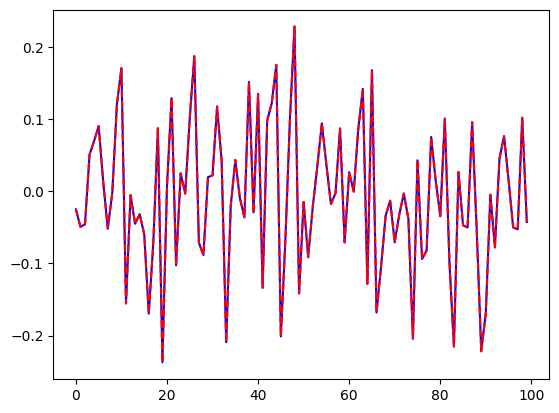


Nota: l'aggiunta di rumore è impercettibile...



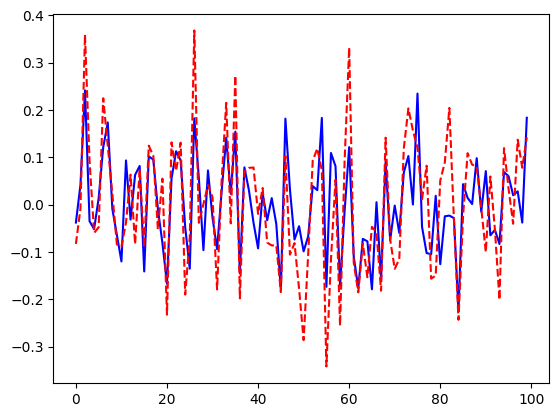


... ma la perdita di accuratezza è disastrosa:
errore relativo LU =  0.9554257833337405 



In [10]:
# ora aggiungiamo al membro destro un termine di errore molto piccolo
# ma allineato alla parte peggio condizionata di A:
ncv = n-1
delta_b = 0.001*U[:,ncv]
br = b + delta_b
plt.figure(3); plt.plot(b,'b-'); plt.plot(br,'r--'); plt.show()
print('''
Nota: l'aggiunta di rumore è impercettibile...
''')

x_LU = np.linalg.solve(A, br)
plt.figure(4); plt.plot(x_vero,'b-'); plt.plot(x_LU,'r--'); plt.show()
print('''
... ma la perdita di accuratezza è disastrosa:
errore relativo LU = ''', np.linalg.norm(x_LU - x_vero, 2)/np.linalg.norm(x_vero, 2),'''
''')